# **business problems, metrics, goals**

Simple CRISP-DM Analysis :\
Business Understanding \
Problem : \
• The hospital has a datasheet which consists of four databases namely Cleveland, Hungary, Switzerland, and Long Beach V. \
• Hospitals have problems predicting heart disease with a number of factors that influence it. \
• Hospitals feel the need to understand the factors that can affect the predictive rate of heart disease in patients. \
• Many factors affect the predictive rate of heart disease and will investigate the relationship between several factors, so as to better monitor the predicted rate of heart disease. \
Metrics : \
The health metric used for this case is =\
1. Age: This metric calculates the age of a patient with heart disease. \
2. Cholesterol: This metric calculates cholesterol in patients with heart disease. \
3. Blood pressure: This metric calculates the blood pressure of patients with heart disease. \
4. Heart rate: This metric calculates the heart rate of patients with heart disease. \
5. level of depression: This metric calculates the level of depression in patients with heart disease. \

Objective : \
To investigate the relationship between a number of factors that influence the predictive rate of heart disease.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Install library
#!pip install dataprep

#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import random
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import io
#from dataprep.eda import *
#from dataprep.eda import create_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/hearts/heart.csv


**Attribute Dataset** \
1. Age = Age
2. Sex = Gender (male = 1, female = 0)
3. cp = Chest pain (4 points)
4. tresbps = resting blood pressure in mm Hg
5. chol = serum cholesterol in mg/dl
6. fbs = fasting blood sugar > 120 mg/dl (yes = 1, no = 0)
7. restecg = resting electrocardiography results (value 0,1,2)
8. thalach = maximum heart rate
9. exang = Exercise induced angina (yes = 1, no = 0)
10. oldpeak = ST exercise-induced depression relative to rest
11. slope = peak training ST segment slope
12. ca = Blood vessels that are colored after being stained by flourosopy (0-3)
13. thal = type of blood vessel damage 0 = normal; 1 = permanent disability; 2 = temporary disability
14. target = Indication of heart disease (yes = 1, no = 0)

In [2]:
#create a dataframe
data = pd.read_csv("/kaggle/input/hearts/heart.csv")

In [3]:
#Call the data table
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
#check shape data
data.shape

(1025, 14)

# **Quality of the dataset**

Checking for missing values in the dataset

In [5]:
#Check data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
#Change data type
data["sex"] = data["sex"].astype("object")
data["cp"] = data["cp"].astype("object")
data["fbs"] = data["fbs"].astype("object")
data["restecg"] = data["restecg"].astype("object")
data["exang"] = data["exang"].astype("object")
data["slope"] = data["slope"].astype("object")
data["thal"] = data["thal"].astype("object")

In [7]:
#Check missing value
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Notes :
There is no Missing Value in the data anymore

Checking for outliers in the dataset

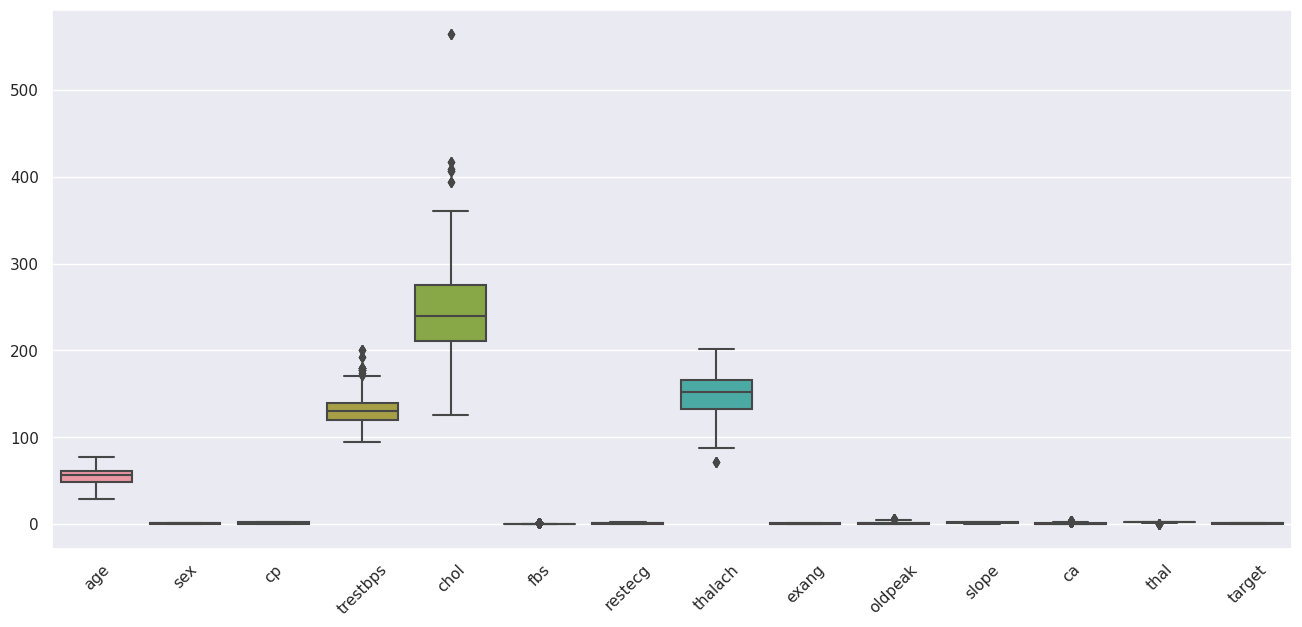

In [8]:
#Check Outliers
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

In [9]:
#Remove outliers
cat = data.select_dtypes(include='object').columns #object type columns
num = list(data.select_dtypes(exclude='object').columns) #numerical type columns
num.remove('target')

In [10]:
#Use IQR methode
for cols in num:
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    data[cols] = data[cols].mask(data[cols]<lr, lr, )
    data[cols] = data[cols].mask(data[cols]>ur, ur, )

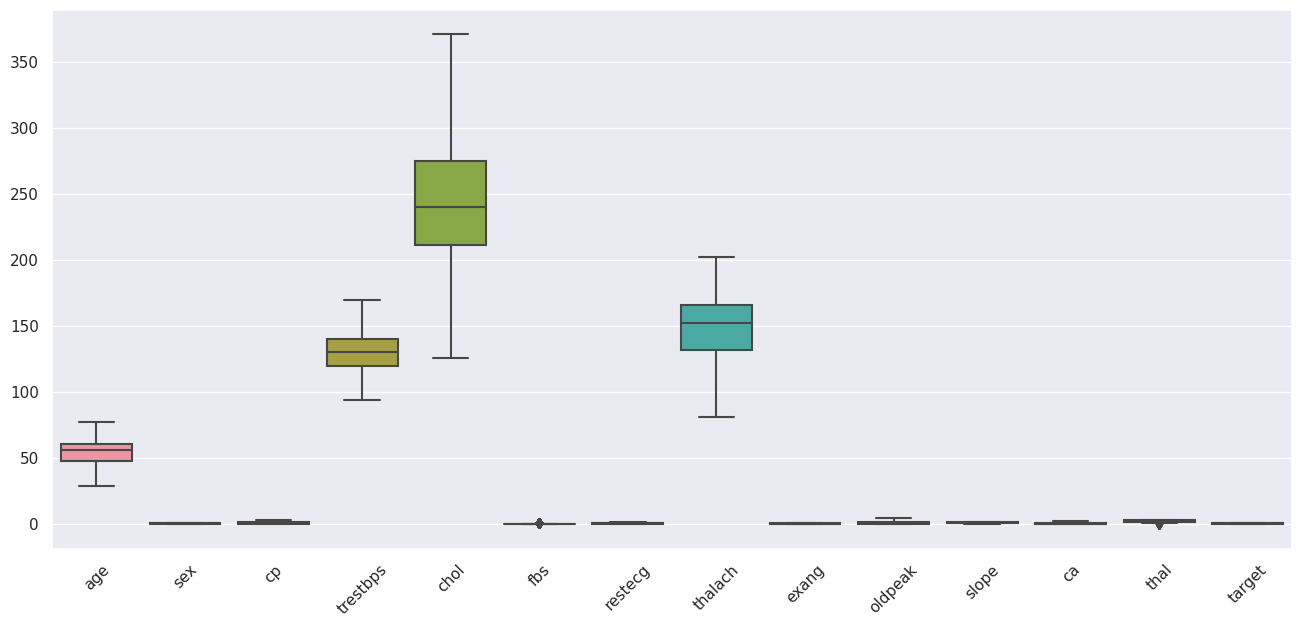

In [11]:
#Check again whether there are still outliers
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

Notes :
There are no outliers anymore

Checking Imbalances on the dataset

In [12]:
#Check if the data balances
labels=["Healthy","Heart Disease"]

healthy_or_not = data['target'].value_counts().tolist()
values = [healthy_or_not[0], healthy_or_not[1]]

fig = px.pie(values=data['target'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["green","red"]
             ,title="Healthy vs Heart Disease")
fig.show()

Notes :
Data is included in the balance category

# **Descriptive statistics of the dataset**

Displays descriptive data dataset

In [13]:
#Displays Descriptive Statistics of data
data.describe(include='all')

age     sex      cp     trestbps         chol     fbs  \
count   1025.000000  1025.0  1025.0  1025.000000  1025.000000  1025.0   
unique          NaN     2.0     4.0          NaN          NaN     2.0   
top             NaN     1.0     0.0          NaN          NaN     0.0   
freq            NaN   713.0   497.0          NaN          NaN   872.0   
mean      54.434146     NaN     NaN   131.260488   244.981463     NaN   
std        9.072290     NaN     NaN    16.532208    47.746162     NaN   
min       29.000000     NaN     NaN    94.000000   126.000000     NaN   
25%       48.000000     NaN     NaN   120.000000   211.000000     NaN   
50%       56.000000     NaN     NaN   130.000000   240.000000     NaN   
75%       61.000000     NaN     NaN   140.000000   275.000000     NaN   
max       77.000000     NaN     NaN   170.000000   371.000000     NaN   

        restecg      thalach   exang      oldpeak   slope           ca  \
count    1025.0  1025.000000  1025.0  1025.000000  1025.0  1025.000000   
unique      3.0          NaN     2.0          NaN     3.0          NaN   
top         1.0          NaN     0.0          NaN     1.0          NaN   
freq      513.0          NaN   680.0          NaN   482.0          NaN   
mean        NaN   149.153171     NaN     1.062244     NaN     0.694146   
std         NaN    22.881210     NaN     1.141865     NaN     0.890414   
min         NaN    81.000000     NaN     0.000000     NaN     0.000000   
25%         NaN   132.000000     NaN     0.000000     NaN     0.000000   
50%         NaN   152.000000     NaN     0.800000     NaN     0.000000   
75%         NaN   166.000000     NaN     1.800000     NaN     1.000000   
max         NaN   202.000000     NaN     4.500000     NaN     2.500000   

          thal       target  
count   1025.0  1025.000000  
unique     4.0          NaN  
top        2.0          NaN  
freq     544.0          NaN  
mean       NaN     0.513171  
std        NaN     0.500070  
min        NaN     0.000000  
25%        NaN     0.000000  
50%        NaN     1.000000  
75%        NaN     1.000000  
max        NaN     1.000000

# **Correlation between features**

In [14]:
#Checking Correlation between Variables
data.corr(numeric_only = False)

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.278179  0.213481  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.067713 -0.181965  0.027200   
cp       -0.071966 -0.041119  1.000000  0.047868 -0.097159  0.079294   
trestbps  0.278179 -0.067713  0.047868  1.000000  0.135275  0.170346   
chol      0.213481 -0.181965 -0.097159  0.135275  1.000000  0.030109   
fbs       0.121243  0.027200  0.079294  0.170346  0.030109  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.127729 -0.137856 -0.104051   
thalach  -0.389986 -0.048505  0.306946 -0.044016 -0.031752 -0.009629   
exang     0.088163  0.139157 -0.401513  0.046996  0.083081  0.049261   
oldpeak   0.210314  0.091250 -0.172375  0.173377  0.067534  0.014577   
slope    -0.169105 -0.026666  0.131633 -0.110336 -0.006644 -0.061902   
ca        0.320251  0.101424 -0.203497  0.103535  0.101442  0.147029   
thal      0.072297  0.198424 -0.163341  0.047446  0.091881 -0.042177   
target   -0.229324 -0.279501  0.434854 -0.132301 -0.118254 -0.041164   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.132696 -0.389986  0.088163  0.210314 -0.169105  0.320251   
sex      -0.055117 -0.048505  0.139157  0.091250 -0.026666  0.101424   
cp        0.043581  0.306946 -0.401513 -0.172375  0.131633 -0.203497   
trestbps -0.127729 -0.044016  0.046996  0.173377 -0.110336  0.103535   
chol     -0.137856 -0.031752  0.083081  0.067534 -0.006644  0.101442   
fbs      -0.104051 -0.009629  0.049261  0.014577 -0.061902  0.147029   
restecg   1.000000  0.050195 -0.065606 -0.050546  0.086086 -0.097487   
thalach   0.050195  1.000000 -0.383566 -0.354962  0.396394 -0.232903   
exang    -0.065606 -0.383566  1.000000  0.317703 -0.267335  0.135755   
oldpeak  -0.050546 -0.354962  0.317703  1.000000 -0.573686  0.256080   
slope     0.086086  0.396394 -0.267335 -0.573686  1.000000 -0.081113   
ca       -0.097487 -0.232903  0.135755  0.256080 -0.081113  1.000000   
thal     -0.020504 -0.099493  0.197201  0.199712 -0.094090  0.159113   
target    0.134468  0.423445 -0.438029 -0.442847  0.345512 -0.432324   

              thal    target  
age       0.072297 -0.229324  
sex       0.198424 -0.279501  
cp       -0.163341  0.434854  
trestbps  0.047446 -0.132301  
chol      0.091881 -0.118254  
fbs      -0.042177 -0.041164  
restecg  -0.020504  0.134468  
thalach  -0.099493  0.423445  
exang     0.197201 -0.438029  
oldpeak   0.199712 -0.442847  
slope    -0.094090  0.345512  
ca        0.159113 -0.432324  
thal      1.000000 -0.337838  
target   -0.337838  1.000000

# **Visualize Descriptive Statisticsand Correlation of the Dataset**

## Visualize Descriptive Statistics

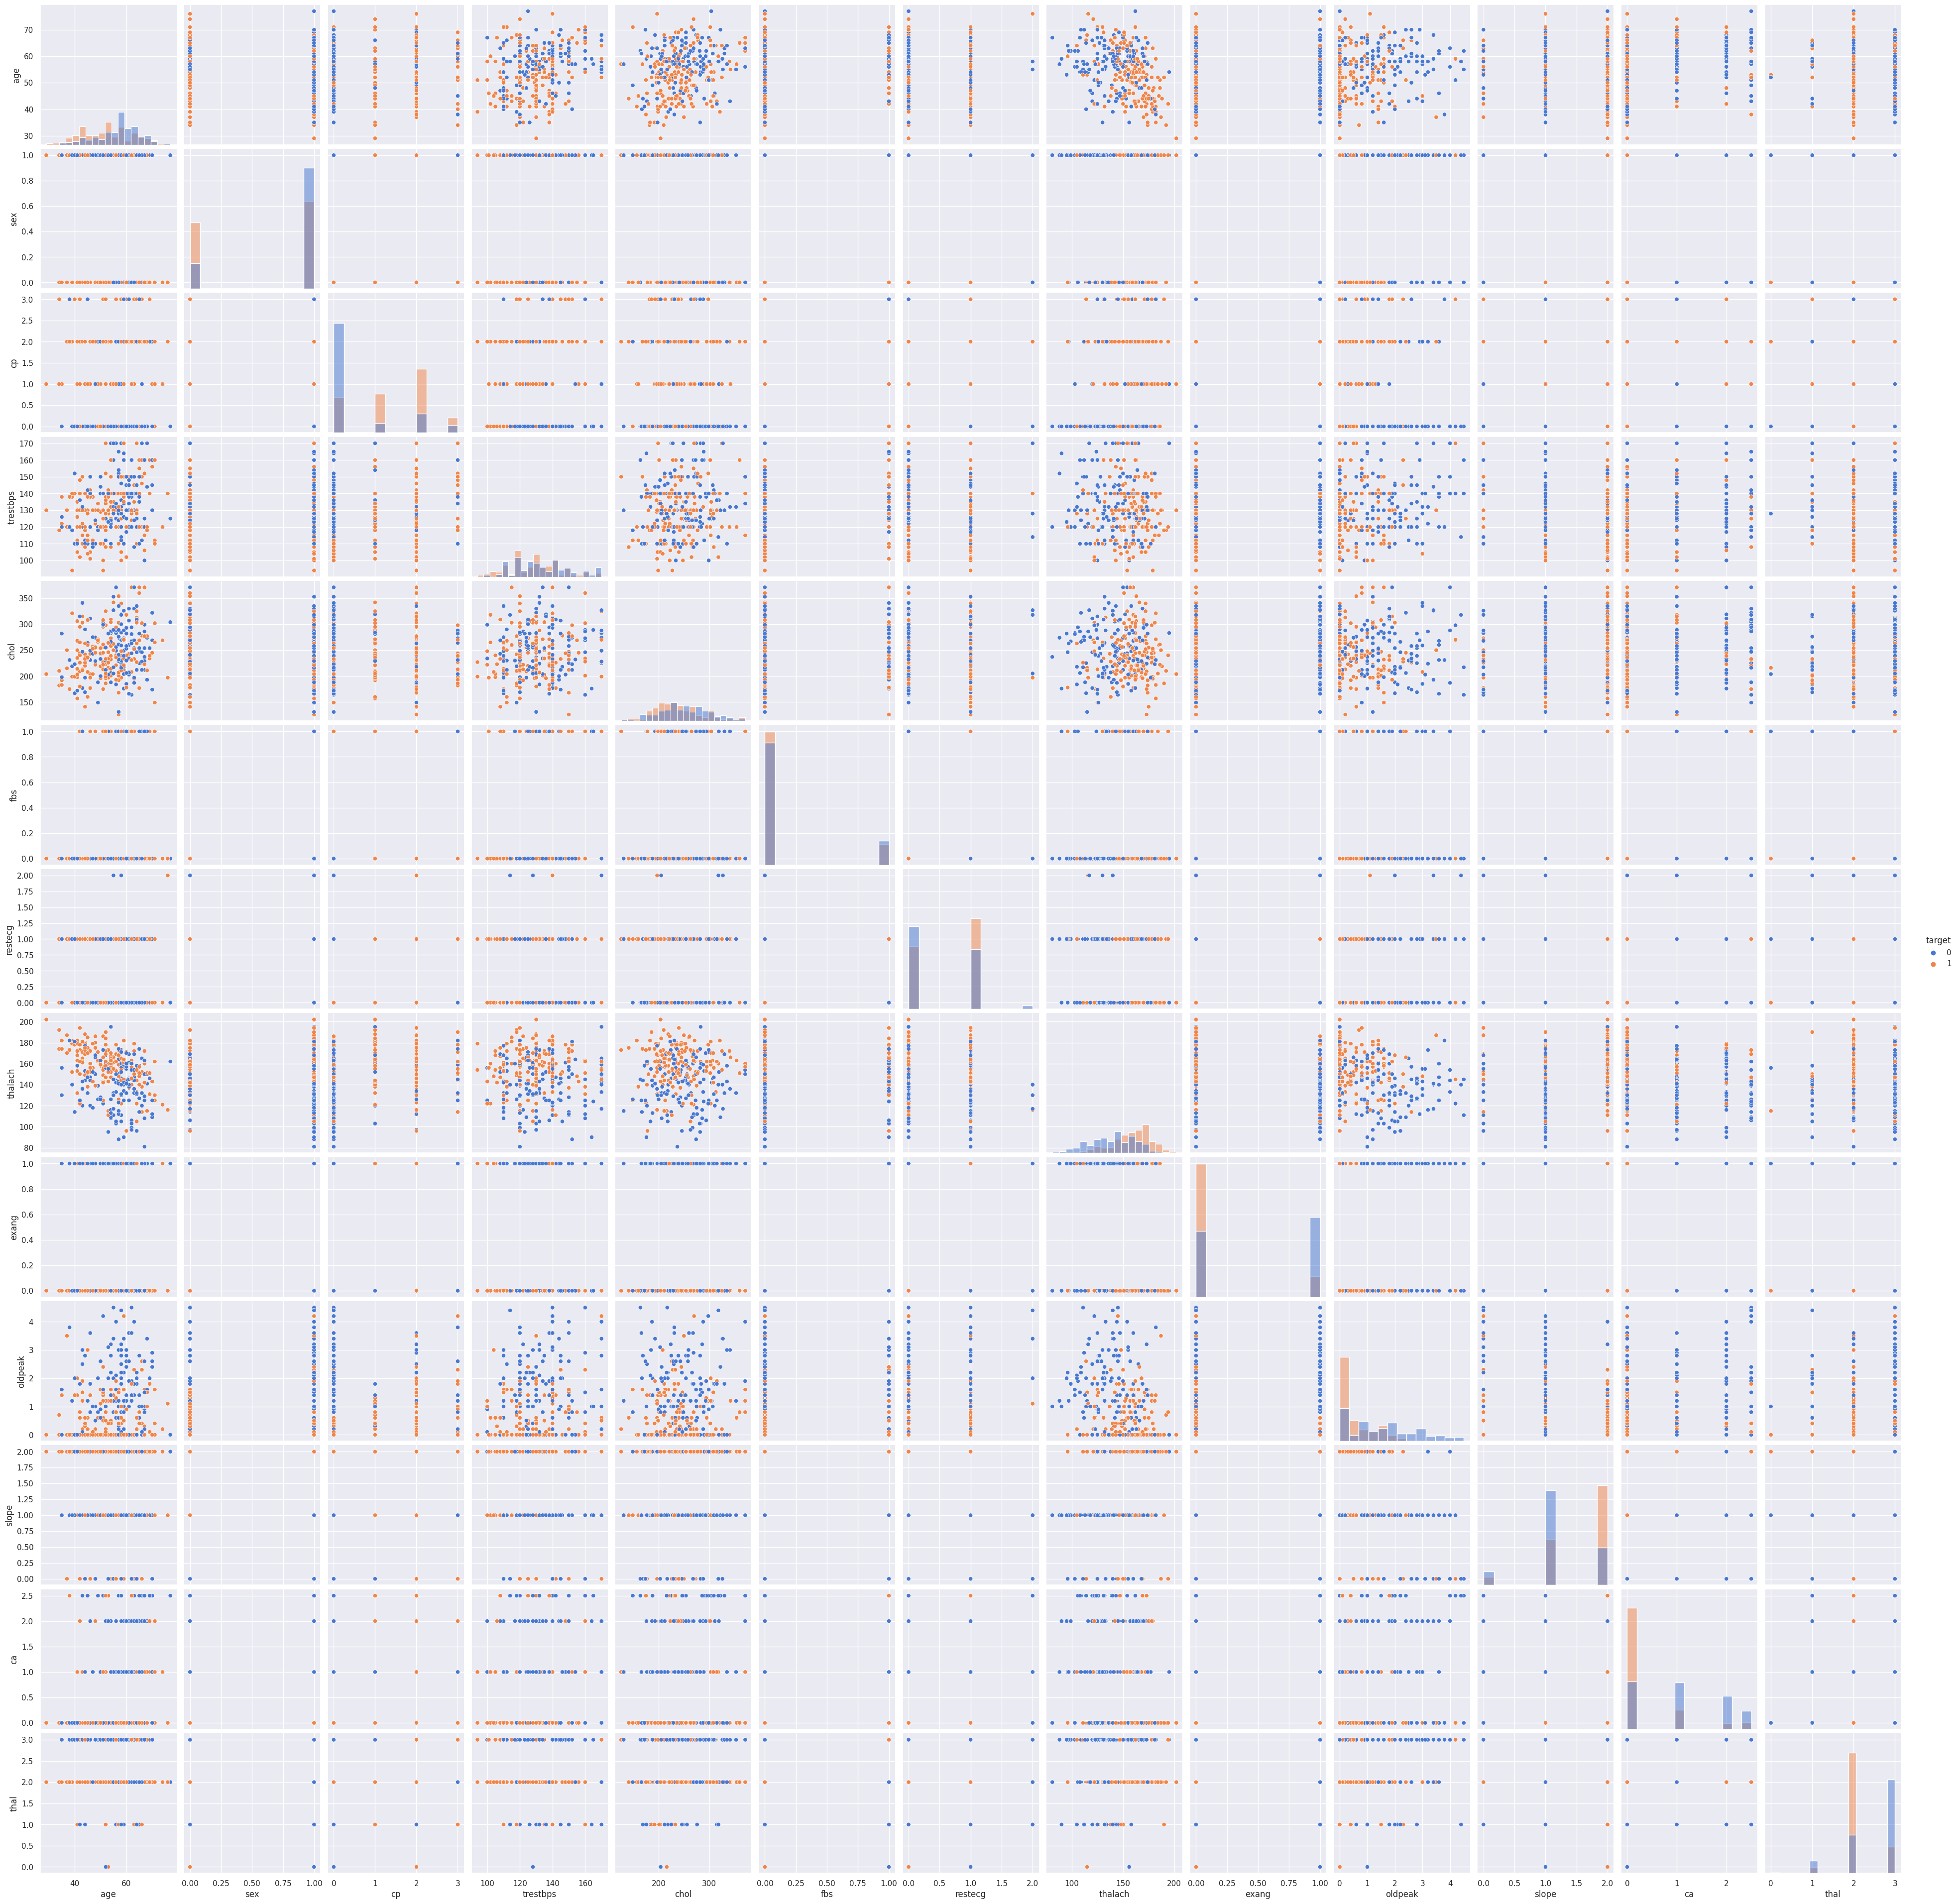

In [15]:
#Visualisasi Stastitik Deskriptif
sns.pairplot(data, hue='target', height=3, diag_kind="hist")

### Visualize Descriptive Statistics kategorical

<AxesSubplot: xlabel='sex', ylabel='count'>

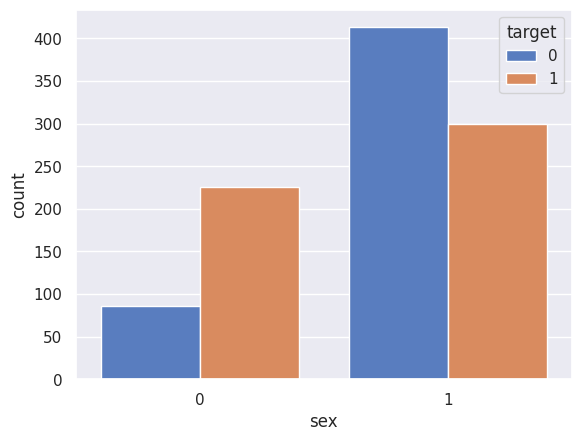

In [16]:
sns.countplot(data=data, x="sex", hue="target")

<AxesSubplot: xlabel='cp', ylabel='count'>

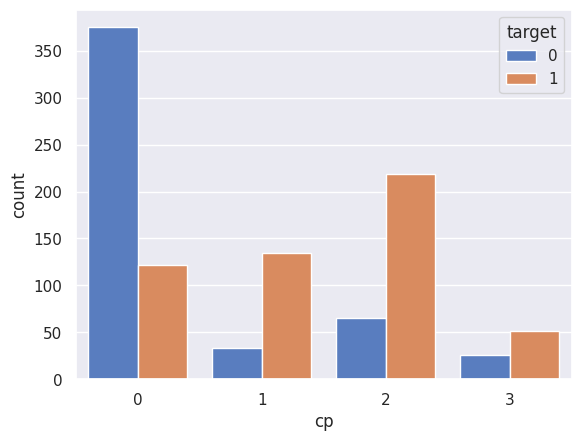

In [17]:
sns.countplot(data=data, x="cp", hue="target")

<AxesSubplot: xlabel='fbs', ylabel='count'>

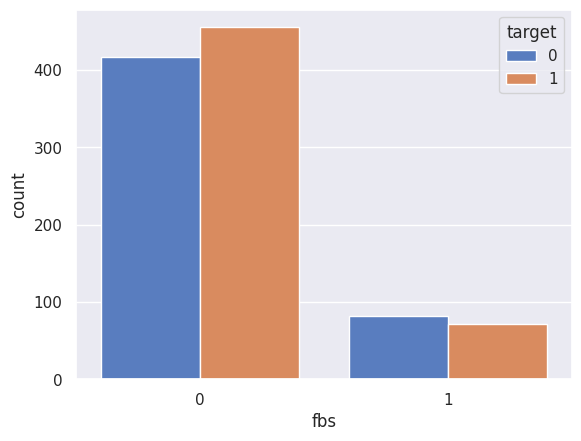

In [18]:
sns.countplot(data=data, x="fbs", hue="target")

<AxesSubplot: xlabel='restecg', ylabel='count'>

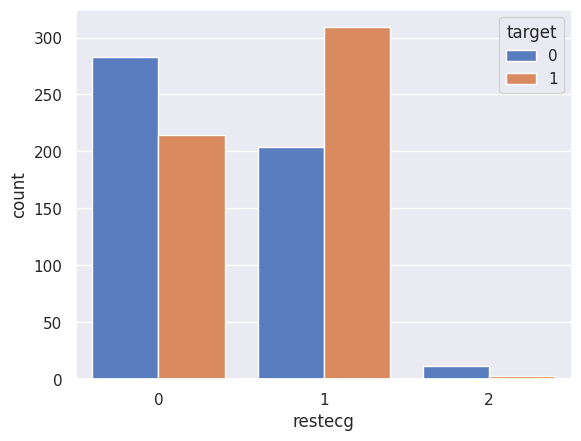

In [19]:
sns.countplot(data=data, x="restecg", hue="target")

<AxesSubplot: xlabel='exang', ylabel='count'>

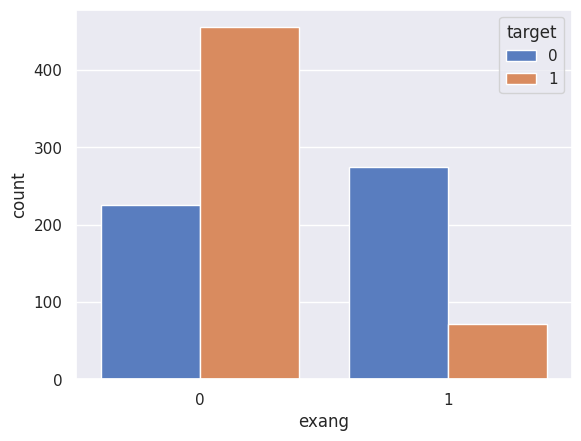

In [20]:
sns.countplot(data=data, x="exang", hue="target")

<AxesSubplot: xlabel='slope', ylabel='count'>

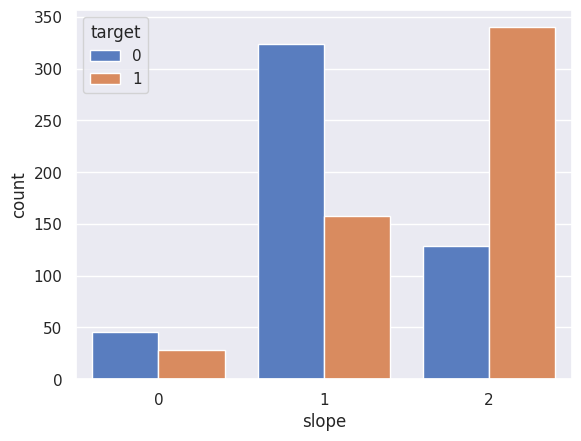

In [21]:
sns.countplot(data=data, x="slope", hue="target")

<AxesSubplot: xlabel='ca', ylabel='count'>

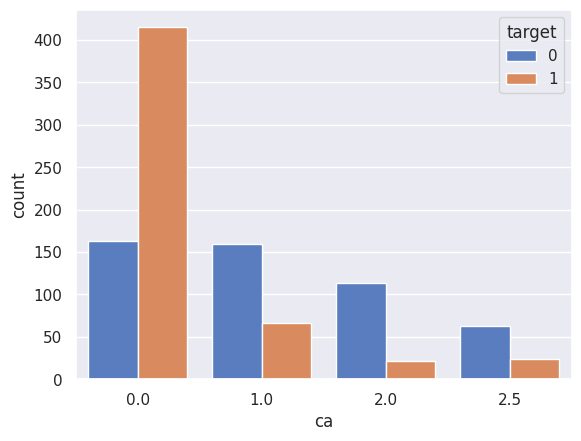

In [22]:
sns.countplot(data=data, x="ca", hue="target")

<AxesSubplot: xlabel='thal', ylabel='count'>

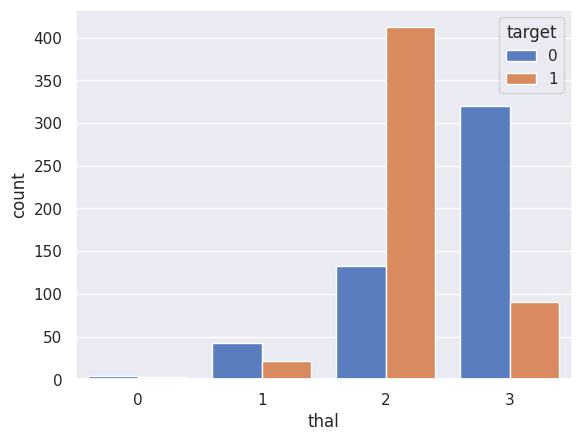

In [23]:
sns.countplot(data=data, x="thal", hue="target")

<AxesSubplot: xlabel='target', ylabel='count'>

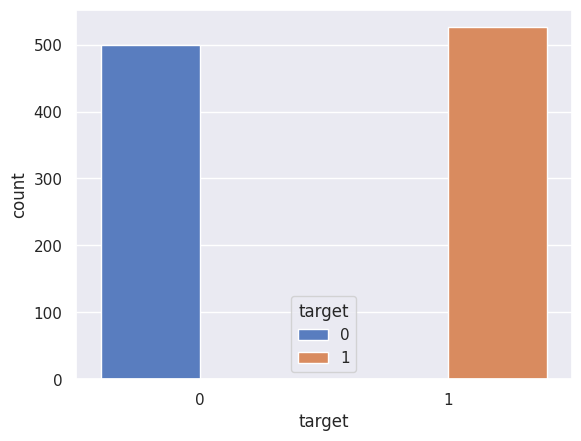

In [24]:
sns.countplot(data=data, x="target", hue="target")

### Visualize Descriptive Statistics numeric

<AxesSubplot: xlabel='age', ylabel='Count'>

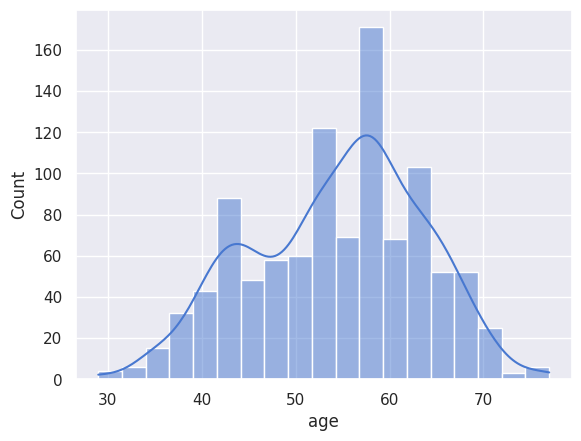

In [25]:
sns.histplot(data=data, x="age", kde=True)

<AxesSubplot: xlabel='trestbps', ylabel='Count'>

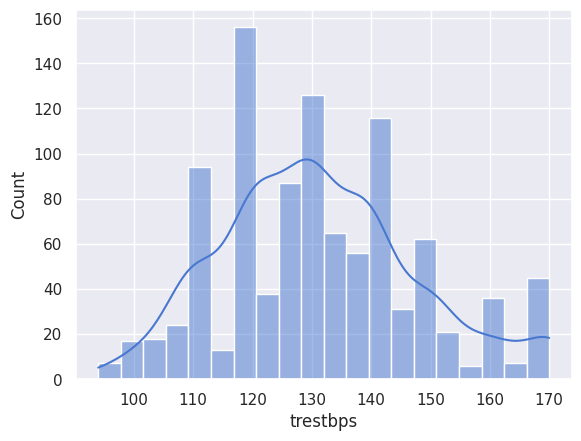

In [26]:
sns.histplot(data=data, x="trestbps", kde=True)

<AxesSubplot: xlabel='chol', ylabel='Count'>

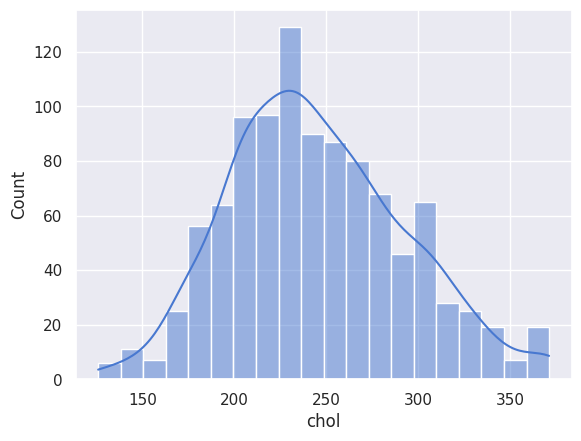

In [27]:
sns.histplot(data=data, x="chol", kde=True)

<AxesSubplot: xlabel='thalach', ylabel='Count'>

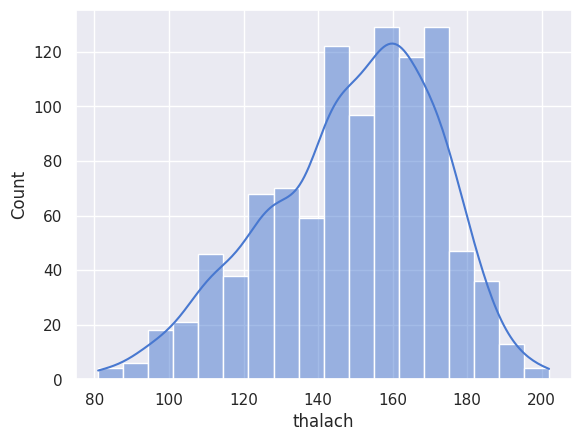

In [28]:
sns.histplot(data=data, x="thalach", kde=True)

<AxesSubplot: xlabel='oldpeak', ylabel='Count'>

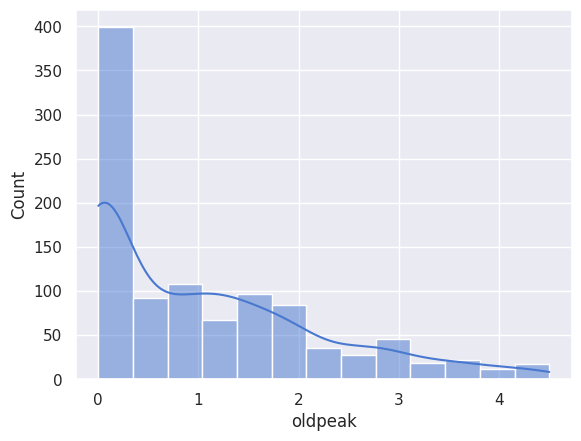

In [29]:
sns.histplot(data=data, x="oldpeak", kde=True)

### Visualization Corretion

<AxesSubplot: >

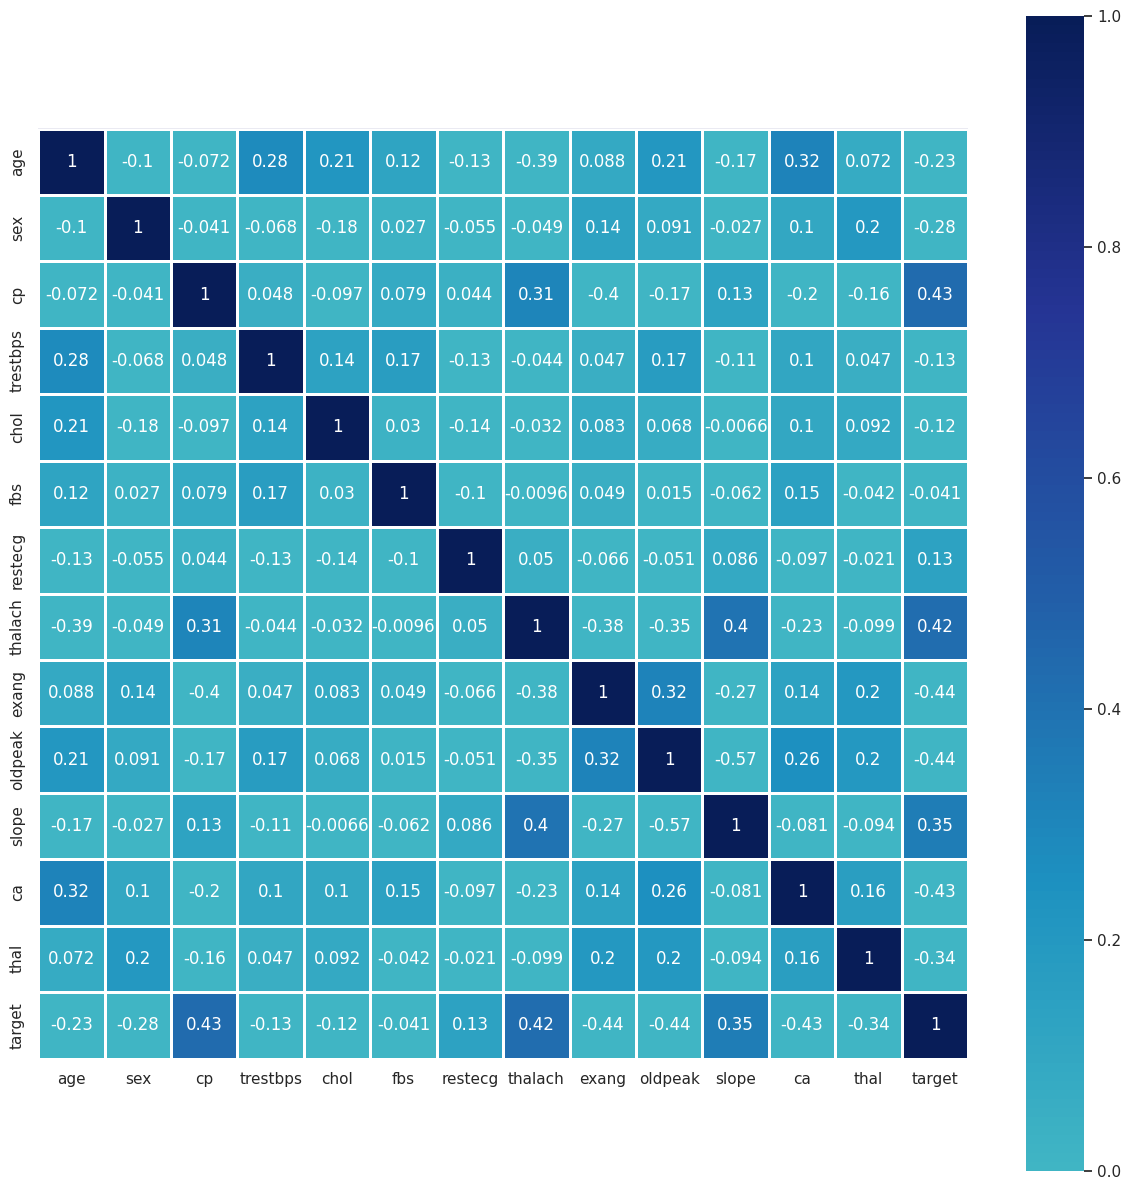

In [30]:
#Table of Correlation
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(numeric_only = False), vmin=0, vmax=1, center=0, annot=True,
                 cmap="YlGnBu", linewidths = 1.0,
                 square=True)

# **feature engineering through encoding**

In [31]:
#one-hot encoding
cp = pd.get_dummies(data['cp'], prefix = 'cp')
fbs = pd.get_dummies(data['fbs'], prefix = 'fbs')
restecg = pd.get_dummies(data['restecg'], prefix = 'restecg')
exang = pd.get_dummies(data['exang'], prefix = 'exang')
slope = pd.get_dummies(data['slope'], prefix = 'slope')
ca = pd.get_dummies(data['ca'], prefix = 'ca')
thal = pd.get_dummies(data['thal'], prefix = 'thal')

frames = [data, cp, restecg, thal, slope]
data_clean = pd.concat(frames, axis = 1)

/tmp/ipykernel_21/2831138899.py:2: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/tmp/ipykernel_21/2831138899.py:3: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/tmp/ipykernel_21/2831138899.py:4: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/tmp/ipykernel_21/2831138899.py:5: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/tmp/ipykernel_21/2831138899.py:6: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/tmp/ipykernel_21/2831138899.py:8: FutureWarning:

In a future ve

In [32]:
#Checking back by calling data
data_clean.head()

age sex cp  trestbps  chol fbs restecg  thalach exang  oldpeak  ...  \
0   52   1  0       125   212   0       1      168     0      1.0  ...   
1   53   1  0       140   203   1       0      155     1      3.1  ...   
2   70   1  0       145   174   0       1      125     1      2.6  ...   
3   61   1  0       148   203   0       1      161     0      0.0  ...   
4   62   0  0       138   294   1       1      106     0      1.9  ...   

  restecg_0  restecg_1 restecg_2  thal_0  thal_1  thal_2  thal_3  slope_0  \
0         0          1         0       0       0       0       1        0   
1         1          0         0       0       0       0       1        1   
2         0          1         0       0       0       0       1        1   
3         0          1         0       0       0       0       1        0   
4         0          1         0       0       0       1       0        0   

   slope_1  slope_2  
0        0        1  
1        0        0  
2        0        0  
3        0        1  
4        1        0  

[5 rows x 28 columns]

/tmp/ipykernel_21/151089960.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

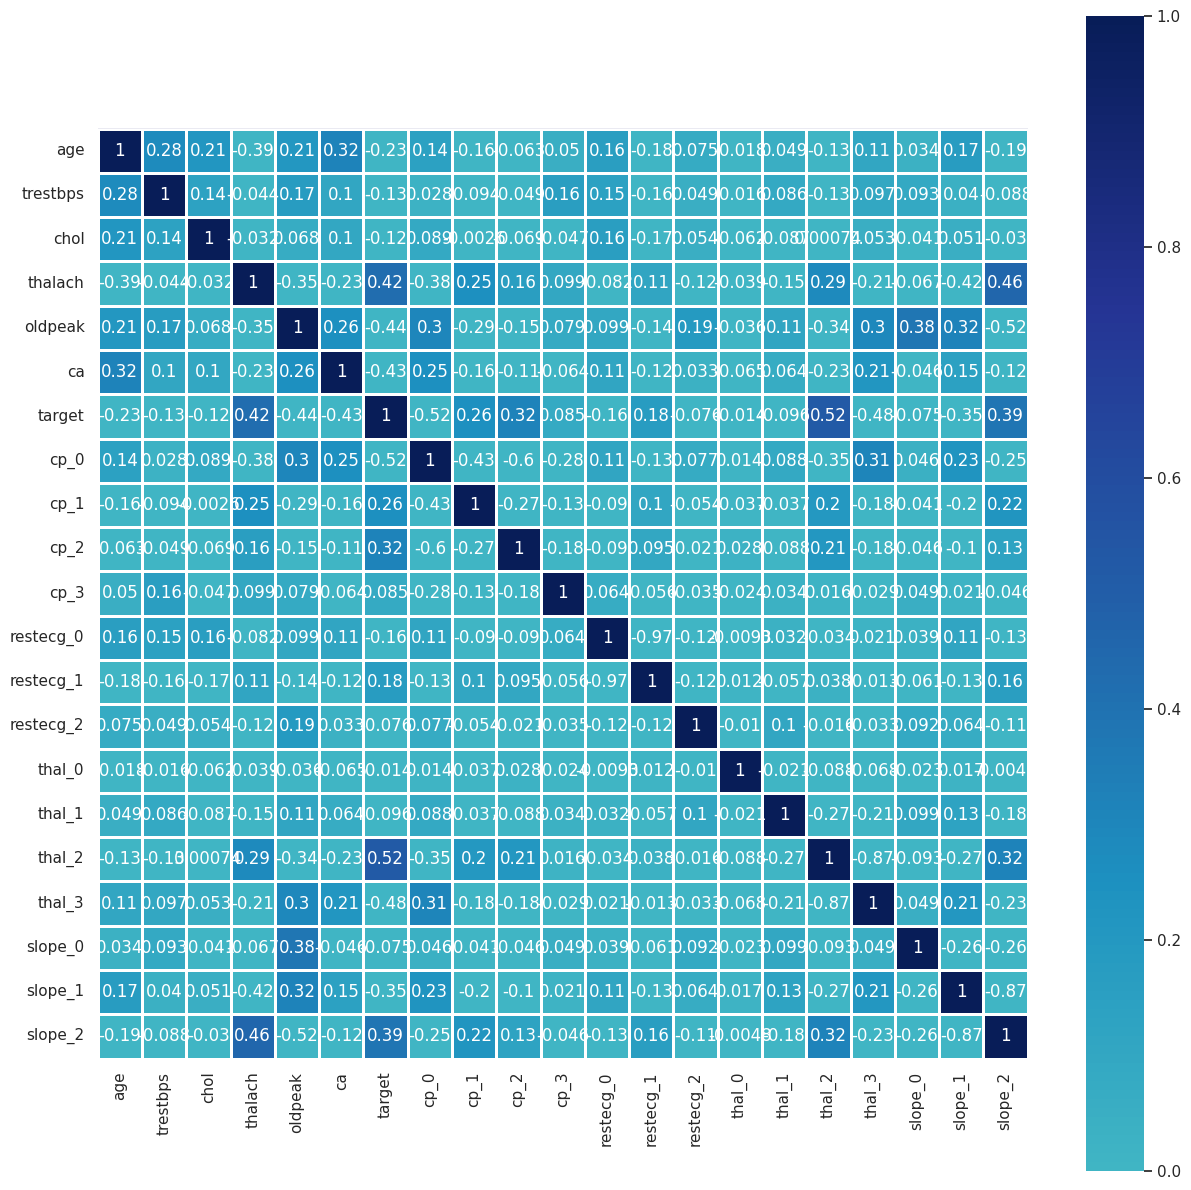

In [33]:
#Table Correation, only numeric feature
plt.figure(figsize=(15,15))
sns.heatmap(data_clean.corr(), vmin=0, vmax=1, center=0, annot=True,
                 cmap="YlGnBu", linewidths = 1.0,
                 square=True)

# **Automate EDA**

# **Machine Learning**

## **Hypothesis from the models**

Within a heart disease data set, there are a number of hypotheses that can be tested: \
\
Hypothesis 1:
The relationship between cholesterol and heart disease risk.

Hypothesis 2:
The relationship between high blood pressure and heart disease risk.

Hypothesis 3:
The relationship between age and heart disease risk. the older a person is, the greater the risk.

Hypothesis 4:
The relationship between blood sugar and heart disease risk. \
\
This hypothesis can be tested by performing a statistical analysis of the heart disease data set. In addition, other hypotheses can be proposed and tested based on other characteristics contained in the material.## **Hypothesis from the models**

Within a heart disease data set, there are a number of hypotheses that can be tested: \
\
Hypothesis 1:
The relationship between cholesterol and heart disease risk.

Hypothesis 2:
The relationship between high blood pressure and heart disease risk.

Hypothesis 3:
The relationship between age and heart disease risk. the older a person is, the greater the risk.

Hypothesis 4:
The relationship between blood sugar and heart disease risk. \
\
This hypothesis can be tested by performing a statistical analysis of the heart disease data set. In addition, other hypotheses can be proposed and tested based on other characteristics contained in the material.

In [34]:
# import library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

## **Choosing 2 models and the reason for choosing that model**

For the modeling stage the writer chose the logistic regression model and Random Forest with an explanation: \
1. Logistic regression: \
modeling with a simple but effective algorithm and commonly used in binary classification problems. This modeling can also provide information about the relationship between features and target variables. \

2. Random Forest:\
Modeling with an algorithm that combines several decision trees to increase accuracy and reduce model variations. this modeling can also handle non-linear relationship between features and target variables and can resolve or deal with missing data. \

## **Stage cross validation and bootstrapping**

In [35]:
#do Melakukan data dummies
df1 = pd.get_dummies(data_clean, drop_first=True)

/tmp/ipykernel_21/4216157532.py:2: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/tmp/ipykernel_21/4216157532.py:2: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/tmp/ipykernel_21/4216157532.py:2: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/tmp/ipykernel_21/4216157532.py:2: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/tmp/ipykernel_21/4216157532.py:2: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/tmp/ipykernel_21/4216157532.py:2: FutureWarning:

In a future ve

In [36]:
# separate the independent and dependent variables
x = df1.drop(['target'], axis=1) #Variabel Independen
y = df1['target']                #Variabel Dependen

In [37]:
#Split data split into 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [38]:
from sklearn.preprocessing import StandardScaler

# create a new function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [39]:
col_names = num
x_train = Standard_Scaler (x_train, col_names)
x_test = Standard_Scaler (x_test, col_names)

## **Modelling**

### **Random Forest Classifier**

**Cross-Validaion**

In [40]:
# Create a Random Forest Classifier model
RFC = RandomForestClassifier()

scores = cross_val_score(RFC, x, y, cv=5)
print("Accuracy with cross-validation: %.2f with standard deviation %.2f" % (scores.mean(), scores.std()))

Accuracy with cross-validation: 1.00 with standard deviation 0.01


**Bootstraping**

In [41]:
# Create a Random forest classifier model
RFC = RandomForestClassifier()

# Use bootstrapping to estimate the accuracy of the model
n_bootstraps = 100
accuracies = []
for i in range(n_bootstraps):
    # Sample the data with replacement
    X_resampled, y_resampled = resample(x, y, replace=True, random_state=i)
    
    # Train the model on the resampled data
    RFC.fit(X_resampled, y_resampled)

    # Evaluate the model on the entire dataset
    accuracy = RFC.score(x, y)
    accuracies.append(accuracy)

# Calculate the mean and confidence interval of the accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
lower_ci = mean_accuracy - 1.96 * std_accuracy
upper_ci = mean_accuracy + 1.96 * std_accuracy

# Print the results
print("Mean accuracy: %.2f" % mean_accuracy)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci, upper_ci))

Mean accuracy: 0.99
95% confidence interval: [0.98, 1.00]


In [42]:
RFC = RandomForestClassifier(n_estimators=1000, random_state=3, max_leaf_nodes=20, min_samples_split=45)

RFC.fit(x_train, y_train)
y_pred_RF = RFC.predict(x_test)
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

.:. Random Forest Accuracy: 82.93% .:.


In [43]:
# Train the model on the training set
RFC.fit(x_train, y_train)

# Make predictions on the training and test sets
y_train_pred = RFC.predict(x_train)
y_test_pred = RFC.predict(x_test)

# Compute the accuracy scores for the training and test sets
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores for the training and test sets
print(f"Train Accuracy: {train_score:.3f}, Test Accuracy: {test_score:.3f}")

Train Accuracy: 0.905, Test Accuracy: 0.829


**Model Evaluation**

In [44]:
y_pred = RFC.predict(x_test)

              precision    recall  f1-score   support

           0       0.85      0.77      0.80        94
           1       0.82      0.88      0.85       111

    accuracy                           0.83       205
   macro avg       0.83      0.82      0.83       205
weighted avg       0.83      0.83      0.83       205



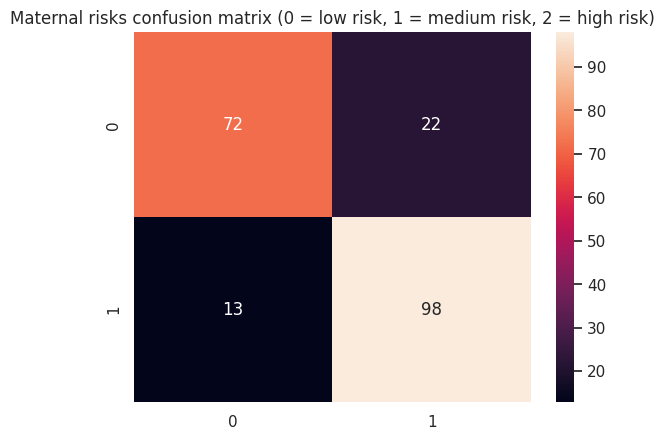

In [45]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_test,y_pred))

in the classification report can be interpreted as follows: \
\
precision :
In the dataset that has been worked on, the model has a precision for the heart disease class of 0.86, which means that 86% of the predictions for the heart disease class are correct. Meanwhile, the precision for the healthy class is 0.82, which means that 100% of the predictions for the healthy class are correct.

Recall (sensitivity):
In the dataset that has been done for the heart disease class is 0.78, which means the model can identify 78% of the observations that actually belong to the heart disease class. Whereas for the healthy class it is 0.89, which means the model can identify 97% of the observations that actually belong to the healthy class.

F1-score :
In the dataset that has been worked on for the average harmonic precision and memory the model has an F1 score for the heart disease class which is 0.82 and for the healthy class is 0.86.

support :
In the dataset that has been worked on, the actual number of events from the classes in this dataset, there are 102 heart disease classes and 103 healthy classes that actually occur in the test.

Accuracy :
In the dataset that has been worked on, the model has an accuracy of 0.84, meaning that the model can correctly predict 84% of all test data.

In [46]:
y_pred_quant = RFC.predict_proba(x_test)[:, 1]

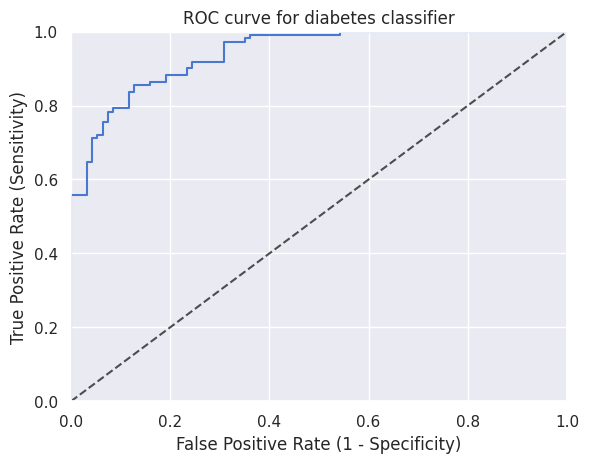

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [48]:
auc(fpr, tpr)

0.93981215257811

AUC value parameter on ROC
- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

**Future Importance**

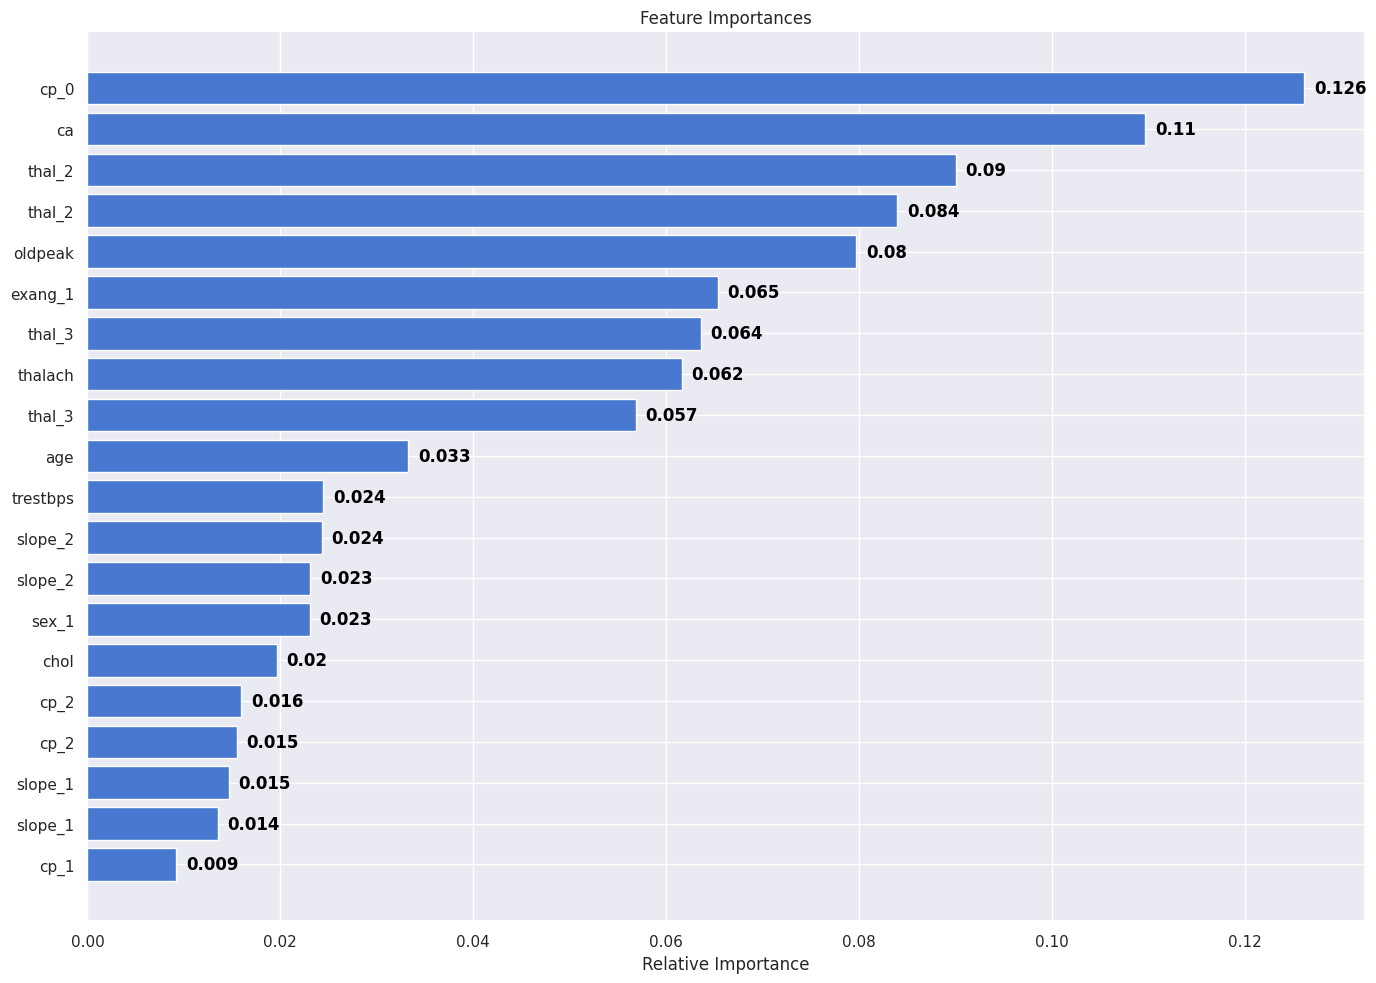

In [49]:
features = x.columns
importances = RFC.feature_importances_
indices = np.argsort(importances)[-20:]

plt.figure(figsize=(14, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

# add feature importance values to the plot
for index, value in enumerate(importances[indices]):
    plt.text(value+0.001, index, str(round(value, 3)), ha='left', va='center', color='black', fontweight='bold')
    
plt.tight_layout()
plt.show()

Based on feature importance from the Logistic Regression modeling results above, cp_0, ca, and thal 2 have an effect on heart disease

### **Logistic Regression**

**cross-validation**

In [50]:
# Create a Logistic Regression model
LR = LogisticRegression()

scores = cross_val_score(LR, x, y, cv=5)
print("Accuracy with cross-validation: %.2f with standard deviation %.2f" % (scores.mean(), scores.std()))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.10/site-packages/sklearn/

Accuracy with cross-validation: 0.87 with standard deviation 0.03


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**bootstraping**

In [51]:
# Create a LogisticRegression model
LR = LogisticRegression()

# Use bootstrapping to estimate the accuracy of the model
n_bootstraps = 100
accuracies = []
for i in range(n_bootstraps):
    # Sample the data with replacement
    X_resampled, y_resampled = resample(x, y, replace=True, random_state=i)
    
    # Train the model on the resampled data
    LR.fit(X_resampled, y_resampled)

    # Evaluate the model on the entire dataset
    accuracy = LR.score(x, y)
    accuracies.append(accuracy)

# Calculate the mean and confidence interval of the accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
lower_ci = mean_accuracy - 1.96 * std_accuracy
upper_ci = mean_accuracy + 1.96 * std_accuracy

# Print the results
print("Mean accuracy: %.2f" % mean_accuracy)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci, upper_ci))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.10/site-packages/sklearn/

Mean accuracy: 0.87
95% confidence interval: [0.85, 0.89]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [52]:
LRC = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRC.fit(x_train, y_train)

y_pred_LR = LRC.predict(x_test)
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

.:. Logistic Regression Accuracy: 86.34% .:.


the accuracy value in this dataset when using RLogistic Regression modeling has an accuracy value of around 84%.

In [53]:
# Train the model on the training set
LRC.fit(x_train, y_train)

# Make predictions on the training and test sets
y_train_pred = LRC.predict(x_train)
y_test_pred = LRC.predict(x_test)

# Compute the accuracy scores for the training and test sets
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores for the training and test sets
print(f"Train Accuracy: {train_score:.3f}, Test Accuracy: {test_score:.3f}")

Train Accuracy: 0.872, Test Accuracy: 0.863


**Model Evaluation**

In [54]:
y_pred_1 = LRC.predict(x_test)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        94
           1       0.85      0.91      0.88       111

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



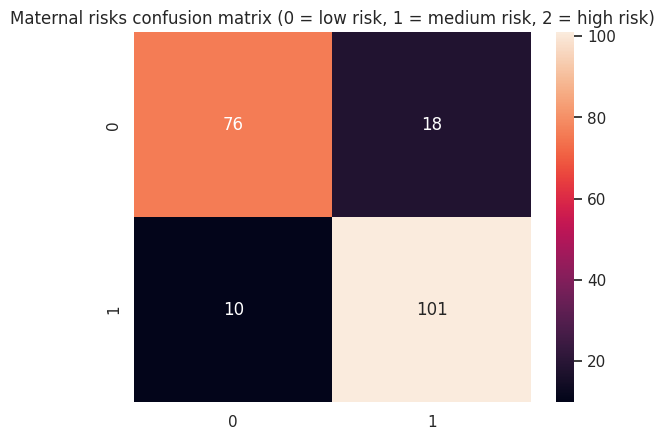

In [55]:
cmLRC = confusion_matrix(y_test, y_pred_1)
sns.heatmap(cmLRC, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_test,y_pred_1))

in the classification report can be interpreted as follows: \
\
precision :
In the dataset that has been worked on, the model has a precision for the heart disease class of 0.85, which means that 85% of the predictions for the heart disease class are correct. Meanwhile, the precision for the healthy class is 0.84, which means that 84% of the predictions for the healthy class are correct.

Recall (sensitivity):
In the dataset that has been done for the heart disease class is 0.81, which means the model can identify 78% of the observations that actually belong to the heart disease class. Whereas for the healthy class it is 0.88, which means the model can identify 97% of the observations that actually belong to the healthy class.

F1-score :
In the dataset that has been worked on for the average harmonic precision and memory the model has an F1 score for the heart disease class which is 0.83 and for the healthy class it is 0.86.

support :
In the dataset that has been worked on the actual number of events from the classes in this dataset, there are 94 heart disease classes and 111 healthy classes that actually occur in the test.

Accuracy :
In the dataset that has been worked on, the model has an accuracy of 0.85, meaning that the model can correctly predict 85% of all test data.

In [56]:
y_pred_quant_1 = LRC.predict_proba(x_test)[:, 1]

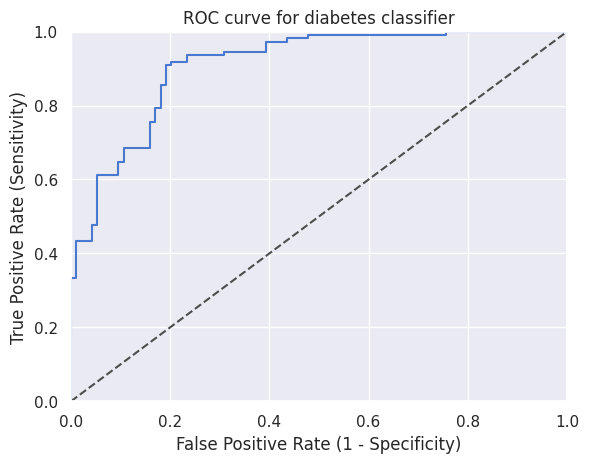

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_1)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [58]:
auc(fpr, tpr)

0.9086639831320683

AUC value parameter on ROC
- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

**Future Importance**

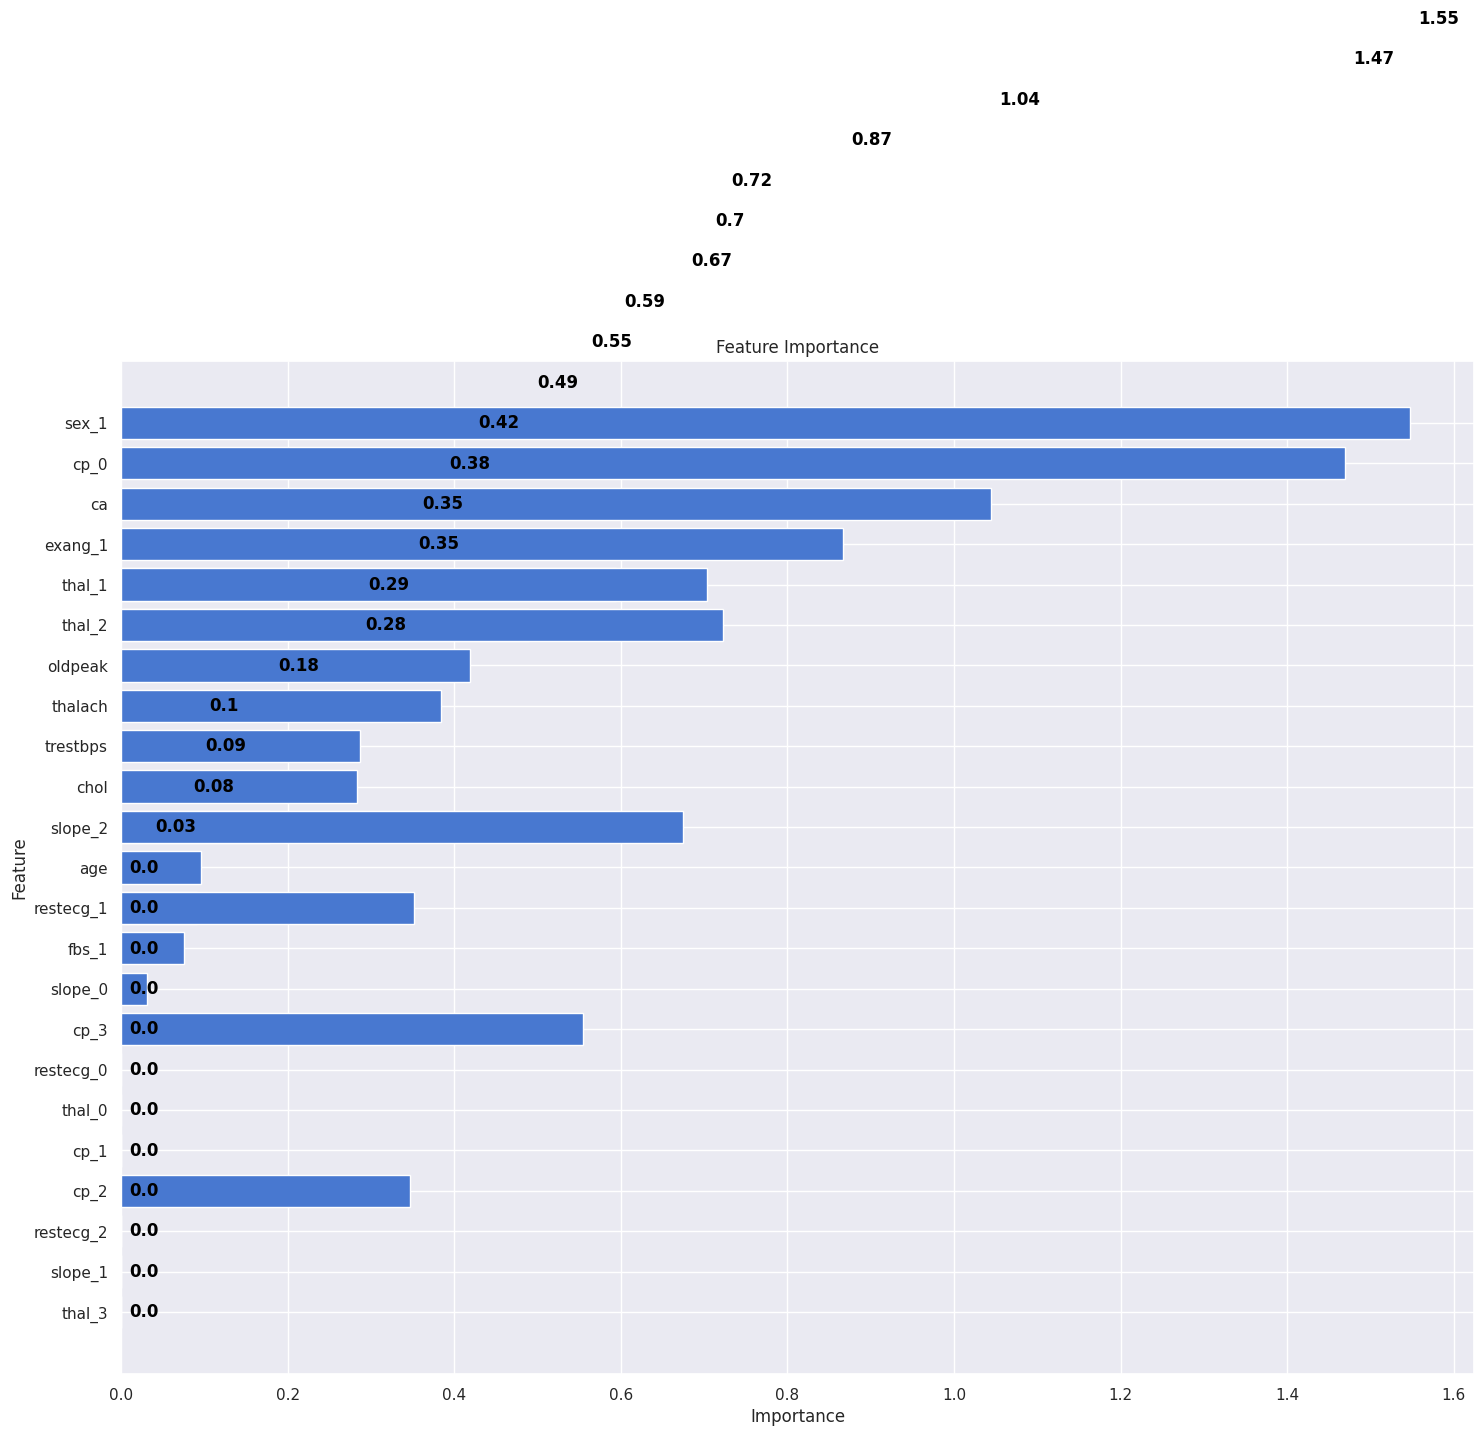

In [59]:
# Do Feature Importance
importance = abs(LRC.coef_[0])
feature_names = x.columns
sorted_idx = np.argsort(importance)
sorted_features = feature_names[sorted_idx]
sorted_importance = importance[sorted_idx]

fig, ax = plt.subplots(figsize=(15,15))

ax.barh(sorted_features, sorted_importance, color='b')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')

for i, v in enumerate(sorted_importance):
    ax.text(v+0.01, i, str(round(v,2)), ha='left', va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

Based on feature importance from the results of the Logostic Regression modeling above sex_1, cp_0, and ca have an effect on heart disease